In [ ]:
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.layers import Embedding
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_cleaned = pd.read_csv('Cleaned_data.csv')


In [ ]:
df_pro = df_cleaned[df_cleaned['target'] == 'pro'][:10000]
df_anti = df_cleaned[df_cleaned['target'] == 'anti'][:10000]
df_cluster = df_pro.append(df_anti)
df_cluster.reset_index(inplace=True,drop=True)

In [ ]:
target_map = {
    'pro':1,
    'anti':0
}

sentiment_map = {
    'Neutral':0,
    'Negative':1,
    'Positive':2,
    "Not Rated":3
}
df_cluster['target']= df_cluster['target'].map(target_map)
df_cluster['Sentiment']= df_cluster['Sentiment'].map(sentiment_map)

In [ ]:
df_cluster[['Hit Sentence','target']]

,Hit Sentence,target
0,stokiedrew find rich tory voters assume unioni...,1
1,albundysdad jazzy brexit whole sorry media circus,1
2,malc hill jazzy important party still subject ...,1
3,inmarshall lord frost expose really see bloc i...,1
4,terryoneiljerry paulbranditv peterjukes sugges...,1
...,...,...
19995,baddiel government imply bbc pay something lik...,0
19996,thegard could vote referendum would pick,0
19997,recover cost brexit billionaires know fund can...,0
19998,campbellclaret things tories say defence johns...,0


In [ ]:
#split test and train
X_train, X_test, y_train, y_test = train_test_split(df_cluster.drop('target',axis=1), 
                                                    df_cluster['target'], test_size=0.15, 
                                                    random_state=42,stratify=df_cluster['target'])

In [ ]:
  X_train['Hit Sentence'].head()

17872    rogue tonight one biggest brexit milestones da...
1949     arcaneslim matthew matthancock drrosena empty ...
7553     facts euorg shock poll show unionist voters ag...
16730    taru sisko fast majority want remain basically...
4981     nwdurhambrexit gbnews give johnson whitty vall...
Name: Hit Sentence, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train['Hit Sentence'])

X_train = tokenizer.texts_to_sequences(X_train['Hit Sentence'])
X_test = tokenizer.texts_to_sequences(X_test['Hit Sentence'])


In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14432999,  0.43950999,  0.58323997, ...,  0.50133997,
         0.49535999,  0.49919999],
       ...,
       [-0.083894  , -0.065695  ,  0.64607   , ..., -0.72079003,
        -0.23582999,  0.65094   ],
       [-0.19058999, -0.44578001,  0.15765999, ..., -0.10878   ,
         0.18716   ,  0.46686   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          2007900   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 2,017,901
Trainable params: 10,001
Non-trainable params: 2,007,900
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10
213/213 [==============================] - 2s 6ms/step - loss: 0.6091 - acc: 0.6564 - val_loss: 0.5746 - val_acc: 0.6950
Epoch 2/10
213/213 [==============================] - 1s 5ms/step - loss: 0.5181 - acc: 0.7421 - val_loss: 0.5498 - val_acc: 0.7141
Epoch 3/10
213/213 [==============================] - 1s 5ms/step - loss: 0.4814 - acc: 0.7669 - val_loss: 0.5404 - val_acc: 0.7235
Epoch 4/10
213/213 [==============================] - 1s 6ms/step - loss: 0.4575 - acc: 0.7832 - val_loss: 0.5389 - val_acc: 0.7259
Epoch 5/10
213/213 [==============================] - 1s 5ms/step - loss: 0.4416 - acc: 0.7924 - val_loss: 0.5329 - val_acc: 0.7271
Epoch 6/10
213/213 [==============================] - 1s 6ms/step - loss: 0.4273 - acc: 0.8002 - val_loss: 0.5330 - val_acc: 0.7329
Epoch 7/10
213/213 [==============================] - 1s 5ms/step - loss: 0.4173 - acc: 0.8044 - val_loss: 0.5345 - val_acc: 0.7315
Epoch 8/10
213/213 [==============================] - 1s 6ms/step - loss: 0.

In [ ]:
preds_test = model.predict(X_test)

94/94 [==============================] - 1s 5ms/step


In [ ]:
preds = []
for i in preds_test:
  if i<=0.5:
    preds.append(0)
  else:
    preds.append(1)

In [ ]:
accuracy_score(y_pred=preds,y_true=y_test)

0.7523333333333333

[Text(0.5, 1.0, 'Neural Network')]

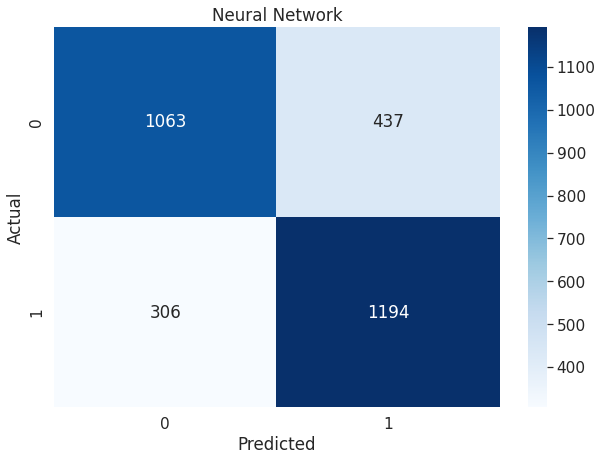

In [ ]:
data = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='g').set(title='Neural Network')